## TSNE AND PCA VISUALIZATION 

### Author: Usama Ashfaq

In [3]:
import pandas as pd
import numpy as np
from sklearn import decomposition
#path = r'C:\Users\user/'

color_layout_features =pd.read_pickle("color_layout_descriptor.pkl")
bow_surf  = pd.read_pickle("bow_surf.pkl")
color_hist_features  = pd.read_pickle("hist.pkl")
labels  = pd.read_pickle("labels.pkl")

#color_layout_features  = pd.read_pickle(path + "/color_layout_descriptor.pkl")
#bow_surf  = pd.read_pickle(path + "/bow_surf.pkl")
#color_hist_features  = pd.read_pickle(path + "/hist.pkl")
#labels  = pd.read_pickle(path +"/labels.pkl")


## This method is for scaling the features

def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 


color_layout_features_scaled = scale(color_layout_features, 0, 1)
color_hist_features_scaled = scale(color_hist_features, 0, 1)
bow_surf_scaled = scale(bow_surf, 0, 1)


features = np.hstack([color_layout_features_scaled, color_hist_features_scaled, bow_surf_scaled])


X, Y = features,labels



## PCA

In [14]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

features=pd.DataFrame(features)
lb=pd.DataFrame(labels)
features['target']=lb
X1, Y1 = features,labels

## Converting the numeric labels to the name labels to show visulization

classes = ('aeroplane', 'bicycle', 'bird', 'boat',
                         'bottle', 'bus', 'car', 'cat', 'chair',
                         'cow', 'diningtable', 'dog', 'horse',
                         'motorbike', 'person', 'pottedplant',
                         'sheep', 'sofa', 'train', 'tvmonitor')
num_classes  = len(classes)
class_to_ind = dict(zip(range(num_classes),classes))


## PCA

pca = decomposition.PCA(n_components=4)
pc = pca.fit_transform(X1)

pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3','PC4'])
pc_df['Cluster'] = Y1
for i in range (len(pc_df)):
    pc_df['Cluster'][i]=class_to_ind.get(pc_df['Cluster'][i])
    
pc_df.shape

<ipython-input-14-07576a6255ec>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_df['Cluster'][i]=class_to_ind.get(pc_df['Cluster'][i])
C:\Users\osama\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(15609, 5)

In [15]:
pca.explained_variance_ratio_

array([0.897351  , 0.00424813, 0.00364065, 0.00281549])

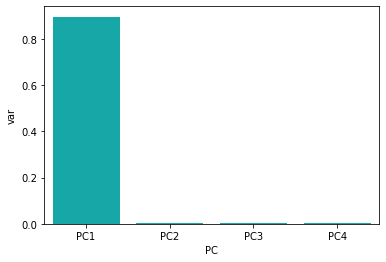

In [16]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

#### Variation of the different components of the PCA. (PCA1 contains most information)

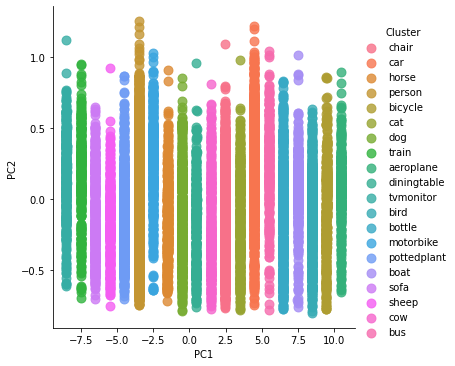

In [18]:
sns.lmplot( x="PC1", y="PC2",data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  
  scatter_kws={"s": 80}
          )
plt.savefig('pca.png')


## TSNE

<ipython-input-6-fd7d61c58b7b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['target'][i]=class_to_ind.get(features['target'][i])
C:\Users\osama\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


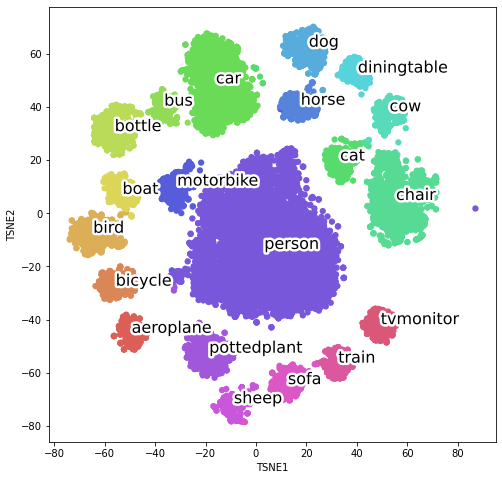

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from sklearn.manifold import TSNE
import pandas as pd



features=pd.DataFrame(features)
lb=pd.DataFrame(labels)
features['target']=lb
    

## Converting the numeric labels to the name labels to show visulization
classes = ('aeroplane', 'bicycle', 'bird', 'boat',
                         'bottle', 'bus', 'car', 'cat', 'chair',
                         'cow', 'diningtable', 'dog', 'horse',
                         'motorbike', 'person', 'pottedplant',
                         'sheep', 'sofa', 'train', 'tvmonitor')
num_classes  = len(classes)
class_to_ind = dict(zip(range(num_classes),classes))



## TSNE

fashion_tsne = TSNE(n_components=2).fit_transform(features)
for i in range (len(features)):
    features['target'][i]=class_to_ind.get(features['target'][i])
    


def fashion_scatter(x, colors):
    
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    plt.xlabel("TSNE1")
    plt.ylabel("TSNE2")
    
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        
        txt = ax.text(xtext, ytext, class_to_ind.get(i), fontsize=16)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(class_to_ind.get(txt))
    plt.savefig('tsne.png')
        
fashion_scatter(fashion_tsne, labels)